### Company XYZ has started a new referral program on Oct, 31. Each user who refers a new user will get 10$\$$ in credit when the new user buys something.

#### The program has been running for almost a month and the Growth Product Manager wants to know if it's been successful. She is very excited cause, since the referral program started, the company saw a spike in number of users and wants you to be able to give her some data she can show to her boss.

#### (1) Can you estimate the impact the program had on the site?

#### (2) Based on the data, what would you suggest to do as a next step?

#### (3) The referral program wasn't really tested in a rigorous way. It simply started on a given day for all users and you are drawing conclusions by looking at the data before and after the test started. What kinds of risks this approach presents? Can you think of a better way to test the referral program and measure its impact?

### Load the package would be used

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 10)
pd.set_option("display.width", 350)

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Read in the data set

In [2]:
referral = pd.read_csv("../Datasets/referral.csv")

### Look into data

In [3]:
print(referral.shape)
print(referral.head)
print(referral.info)

print("Unique country:\t", len(pd.unique(referral["country"])))
print("Unique user id:\t", len(pd.unique(referral["user_id"])))
print("Unique device:\t", len(pd.unique(referral["device_id"])))

print(list(referral.columns))

(97341, 6)
<bound method NDFrame.head of        user_id        date country  money_spent  is_referral      device_id
0            2  2015-10-03      FR           65            0  EVDCJTZMVMJDG
1            3  2015-10-03      CA           54            0  WUBZFTVKXGQQX
2            6  2015-10-03      FR           35            0  CBAPCJRTFNUJG
3            7  2015-10-03      UK           73            0  PRGXJZAJKMXRH
4            7  2015-10-03      MX           35            0  PRGXJZAJKMXRH
...        ...         ...     ...          ...          ...            ...
97336    19934  2015-11-27      UK           35            1  AWMDRMOFTSZIH
97337    19941  2015-11-27      DE           31            1  QAUSDXXLVUERE
97338    19948  2015-11-27      UK           22            1  DCYLHYFLMRODO
97339    19953  2015-11-27      UK           35            1  LROILUYWCNVWQ
97340    19984  2015-11-27      FR           15            1  VFXAMMQDFORSS

[97341 rows x 6 columns]>
<bound method DataFr

### Data Processing

In [4]:
referral["date"] = pd.to_datetime(referral["date"])
referral["flag"] = referral["date"] > pd.to_datetime("2015-10-31")
referral.head()

,user_id,date,country,money_spent,is_referral,device_id,flag
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,False
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX,False
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG,False
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH,False
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH,False


In [5]:
referral[referral["flag"] == 1]["is_referral"].describe()

count    46767.000000
mean         0.560374
std          0.496347
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: is_referral, dtype: float64

### Visualization

#### Daily

##### The number of unique users

        date  user_id
0 2015-10-03     2283
1 2015-10-04     2274
2 2015-10-05     1030
3 2015-10-06     1020
4 2015-10-07      966


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([735872., 735879., 735886., 735893., 735903., 735910., 735917.,
        735924.]), <a list of 8 Text xticklabel objects>)

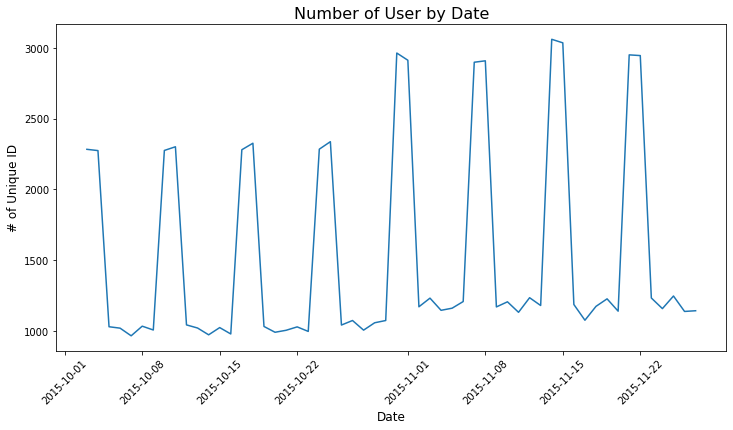

In [6]:
referral = referral.sort_values(by = ["date"])
user_no_by_date = referral[["user_id", "date"]].groupby("date")["user_id"].nunique().reset_index()
print(user_no_by_date.head())

plt.figure(figsize = [12, 6])
sns.lineplot(x = "date", y = "user_id", data = user_no_by_date, palette = "PuBuGn")
plt.title("Number of User by Date", fontsize = 16)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("# of Unique ID", fontsize = 12)
plt.xticks(rotation = 45)

##### The number of purchase

        date  user_id
0 2015-10-03     3048
1 2015-10-04     3081
2 2015-10-05     1135
3 2015-10-06     1156
4 2015-10-07     1078


(array([735872., 735879., 735886., 735893., 735903., 735910., 735917.,
        735924.]), <a list of 8 Text xticklabel objects>)

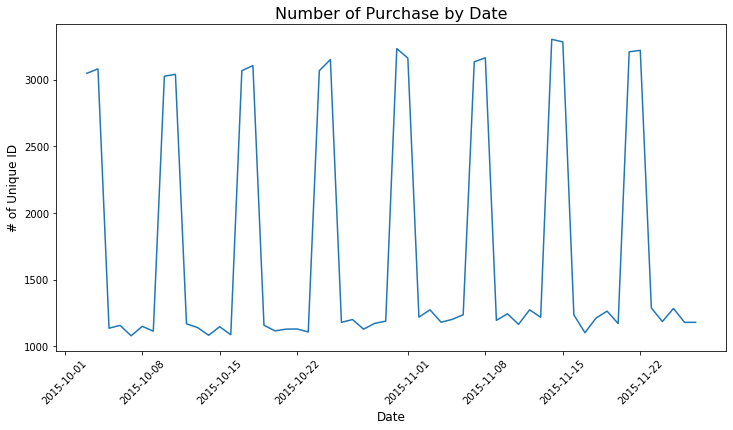

In [7]:
purchase_no_by_date = referral[["user_id", "date"]].groupby("date")["user_id"].count().reset_index()
print(purchase_no_by_date.head())

plt.figure(figsize = [12, 6])
sns.lineplot(x = "date", y = "user_id", data = purchase_no_by_date, palette = "PuBuGn")
plt.title("Number of Purchase by Date", fontsize = 16)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("# of Unique ID", fontsize = 12)
plt.xticks(rotation = 45)

#####  Money spent

        date  money_spent
0 2015-10-03       128475
1 2015-10-04       130772
2 2015-10-05        46946
3 2015-10-06        49711
4 2015-10-07        45242


(array([735872., 735879., 735886., 735893., 735903., 735910., 735917.,
        735924.]), <a list of 8 Text xticklabel objects>)

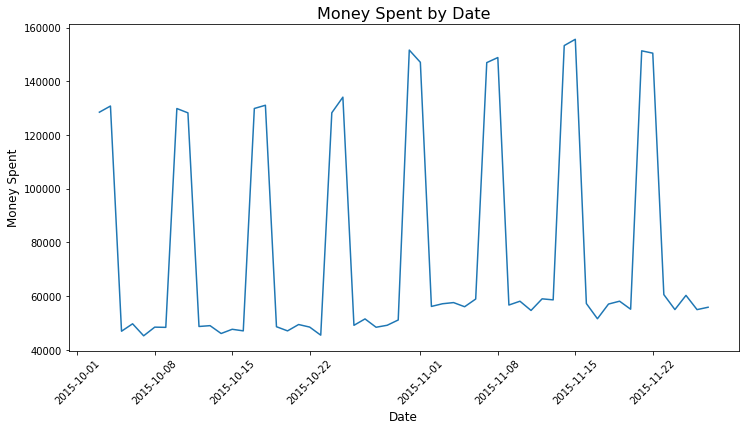

In [8]:
money_by_date = referral[["money_spent", "date"]].groupby("date")["money_spent"].sum().reset_index()
print(money_by_date.head())

plt.figure(figsize = [12, 6])
sns.lineplot(x = "date", y = "money_spent", data = money_by_date, palette = "PuBuGn")
plt.title("Money Spent by Date", fontsize = 16)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Money Spent", fontsize = 12)
plt.xticks(rotation = 45)

##### Profit

        date  money_spent  is_referral  cost  profit
0 2015-10-03       128475            0     0  128475
1 2015-10-04       130772            0     0  130772
2 2015-10-05        46946            0     0   46946
3 2015-10-06        49711            0     0   49711
4 2015-10-07        45242            0     0   45242


(array([735872., 735879., 735886., 735893., 735903., 735910., 735917.,
        735924.]), <a list of 8 Text xticklabel objects>)

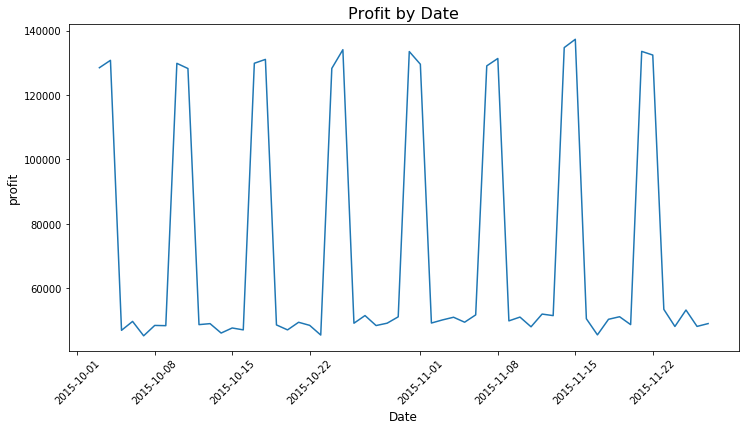

In [9]:
cost_by_date = referral[["is_referral", "date"]].groupby("date")["is_referral"].sum().reset_index()
cost_by_date["cost"] = cost_by_date["is_referral"] * 10
profit_by_date = money_by_date.merge(cost_by_date, on = "date", how = "left")
profit_by_date["profit"] = profit_by_date["money_spent"] - profit_by_date["cost"]
print(profit_by_date.head())

plt.figure(figsize = [12, 6])
sns.lineplot(x = "date", y = "profit", data = profit_by_date, palette = "PuBuGn")
plt.title("Profit by Date", fontsize = 16)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("profit", fontsize = 12)
plt.xticks(rotation = 45)

#### Day of week

##### The number of unique users

   dayofweek  user_id
0          0     6755
1          1     6627
2          2     6575
3          3     6665
4          4     6664


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

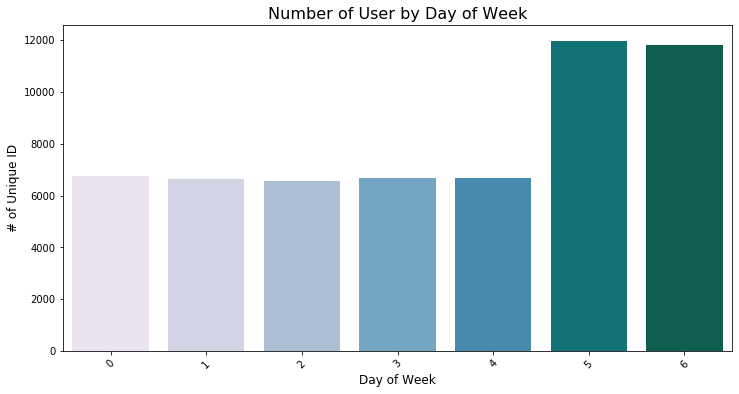

In [10]:
referral["dayofweek"] = referral["date"].dt.dayofweek
user_no_by_weekday = referral[["user_id", "dayofweek"]].groupby("dayofweek")["user_id"].nunique().reset_index()
print(user_no_by_weekday.head())

plt.figure(figsize = [12, 6])
sns.barplot(x = "dayofweek", y = "user_id", data = user_no_by_weekday, palette = "PuBuGn")
plt.title("Number of User by Day of Week", fontsize = 16)
plt.xlabel("Day of Week", fontsize = 12)
plt.ylabel("# of Unique ID", fontsize = 12)
plt.xticks(rotation = 45)

##### The number of purchase

   dayofweek  user_id
0          0     9573
1          1     9413
2          2     9254
3          3     9511
4          4     9296


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

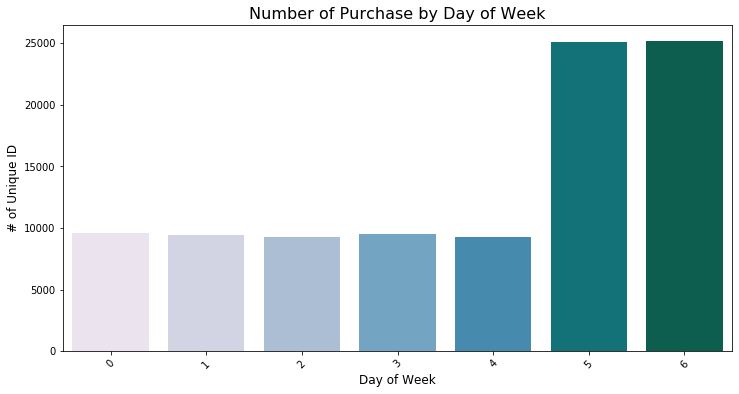

In [11]:
purchase_no_by_weekday = referral[["user_id", "dayofweek"]].groupby("dayofweek")["user_id"].count().reset_index()
print(purchase_no_by_weekday.head())

plt.figure(figsize = [12, 6])
sns.barplot(x = "dayofweek", y = "user_id", data = purchase_no_by_weekday, palette = "PuBuGn")
plt.title("Number of Purchase by Day of Week", fontsize = 16)
plt.xlabel("Day of Week", fontsize = 12)
plt.ylabel("# of Unique ID", fontsize = 12)
plt.xticks(rotation = 45)

##### Money spent

   dayofweek  money_spent
0          0       424134
1          1       419225
2          2       418835
3          3       421953
4          4       420633


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

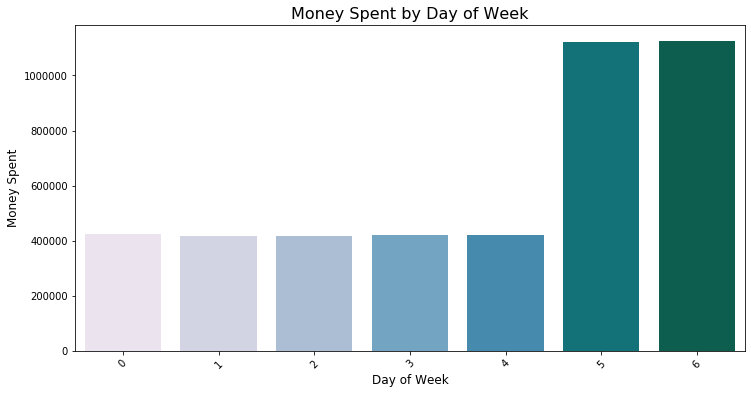

In [12]:
money_by_weekday = referral[["money_spent", "dayofweek"]].groupby("dayofweek")["money_spent"].sum().reset_index()
print(money_by_weekday.head())

plt.figure(figsize = [12, 6])
sns.barplot(x = "dayofweek", y = "money_spent", data = money_by_weekday, palette = "PuBuGn")
plt.title("Money Spent by Day of Week", fontsize = 16)
plt.xlabel("Day of Week", fontsize = 12)
plt.ylabel("Money Spent", fontsize = 12)
plt.xticks(rotation = 45)

##### Profit

   dayofweek  money_spent  is_referral   cost  profit
0          0       424134         2764  27640  396494
1          1       419225         2699  26990  392235
2          2       418835         2697  26970  391865
3          3       421953         2740  27400  394553
4          4       420633         2756  27560  393073


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

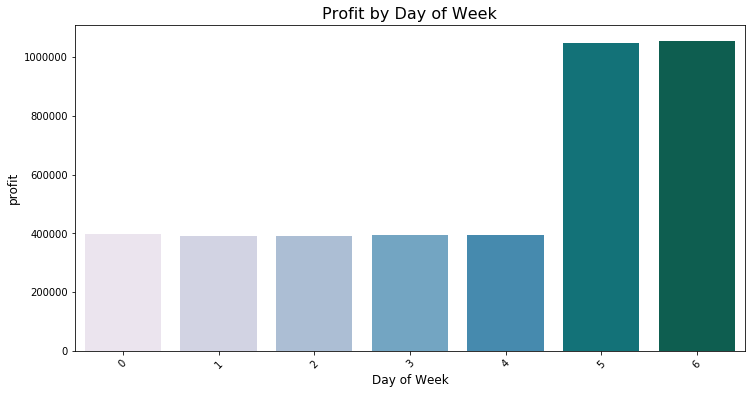

In [13]:
cost_by_weekday = referral[["is_referral", "dayofweek"]].groupby("dayofweek")["is_referral"].sum().reset_index()
cost_by_weekday["cost"] = cost_by_weekday["is_referral"] * 10
profit_by_weekday = money_by_weekday.merge(cost_by_weekday, on = "dayofweek", how = "left")
profit_by_weekday["profit"] = profit_by_weekday["money_spent"] - profit_by_weekday["cost"]
print(profit_by_weekday.head())

plt.figure(figsize = [12, 6])
sns.barplot(x = "dayofweek", y = "profit", data = profit_by_weekday, palette = "PuBuGn")
plt.title("Profit by Day of Week", fontsize = 16)
plt.xlabel("Day of Week", fontsize = 12)
plt.ylabel("profit", fontsize = 12)
plt.xticks(rotation = 45)

#### Country

##### The number of unique users

  country  user_id
0      CA     6492
1      CH     1144
2      DE     7025
3      ES     7032
4      FR     9403


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

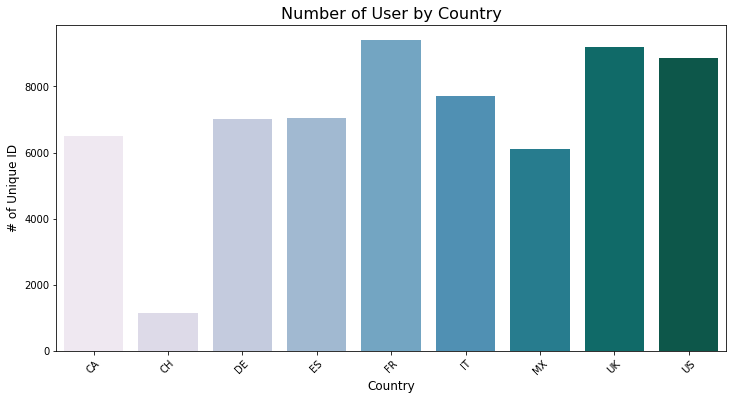

In [14]:
user_no_by_country = referral[["user_id", "country"]].groupby("country")["user_id"].nunique().reset_index()
print(user_no_by_country.head())

plt.figure(figsize = [12, 6])
sns.barplot(x = "country", y = "user_id", data = user_no_by_country, palette = "PuBuGn")
plt.title("Number of User by Country", fontsize = 16)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("# of Unique ID", fontsize = 12)
plt.xticks(rotation = 45)

##### The number of purchase

  country  user_id
0      CA     9440
1      CH     1229
2      DE    11093
3      ES     9831
4      FR    15396


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

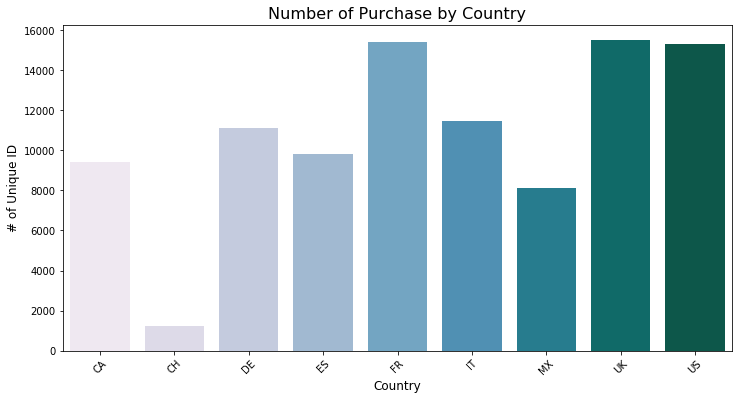

In [15]:
purchase_no_by_country = referral[["user_id", "country"]].groupby("country")["user_id"].count().reset_index()
print(purchase_no_by_country.head())

plt.figure(figsize = [12, 6])
sns.barplot(x = "country", y = "user_id", data = purchase_no_by_country, palette = "PuBuGn")
plt.title("Number of Purchase by Country", fontsize = 16)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("# of Unique ID", fontsize = 12)
plt.xticks(rotation = 45)

##### Money spent

  country  money_spent
0      CA       429768
1      CH        71686
2      DE       500380
3      ES       428658
4      FR       672567


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

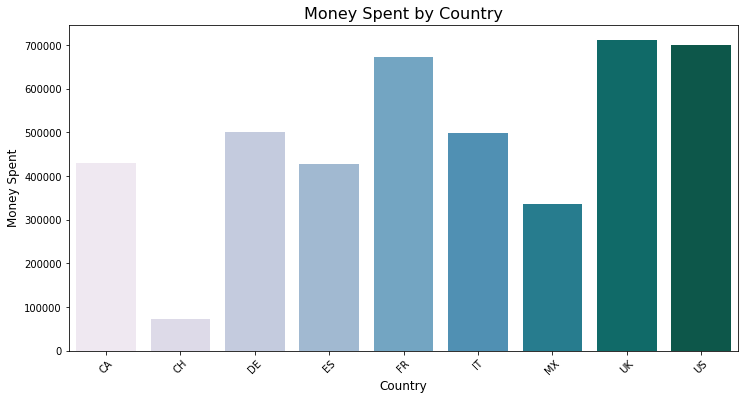

In [16]:
money_by_country = referral[["money_spent", "country"]].groupby("country")["money_spent"].sum().reset_index()
print(money_by_country.head())

plt.figure(figsize = [12, 6])
sns.barplot(x = "country", y = "money_spent", data = money_by_country, palette = "PuBuGn")
plt.title("Money Spent by Country", fontsize = 16)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Money Spent", fontsize = 12)
plt.xticks(rotation = 45)

##### Profit

  country  money_spent  is_referral   cost  profit
0      CA       429768         2506  25060  404708
1      CH        71686          279   2790   68896
2      DE       500380         2578  25780  474600
3      ES       428658         3062  30620  398038
4      FR       672567         4748  47480  625087


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

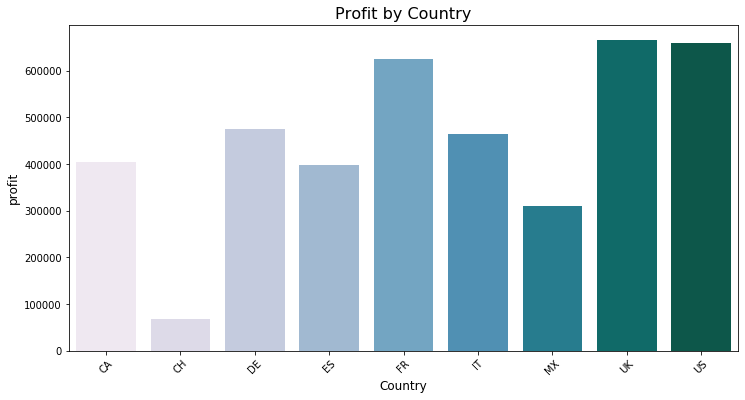

In [17]:
cost_by_country = referral[["is_referral", "country"]].groupby("country")["is_referral"].sum().reset_index()
cost_by_country["cost"] = cost_by_country["is_referral"] * 10
profit_by_country = money_by_country.merge(cost_by_country, on = "country", how = "left")
profit_by_country["profit"] = profit_by_country["money_spent"] - profit_by_country["cost"]
print(profit_by_country.head())

plt.figure(figsize = [12, 6])
sns.barplot(x = "country", y = "profit", data = profit_by_country, palette = "PuBuGn")
plt.title("Profit by Country", fontsize = 16)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("profit", fontsize = 12)
plt.xticks(rotation = 45)

#### (1) Can you estimate the impact the program had on the site?

#### Overall

##### Define the function

In [18]:
def overall_ttest_mean(dat, variable, test):
    overall = stats.ttest_ind(dat[dat[test] == 1][variable], dat[dat[test] == 0][variable], equal_var = False)
    test_group = referral[referral[test] == 1][variable].mean()
    control_group = referral[referral[test] == 0][variable].mean()
    pvalue = overall.pvalue
    overall_result = {"test_group": test_group, "control_group": control_group, "pvalue": pvalue}
    return overall_result

##### Revenue

In [19]:
overall_ttest_mean(dat = referral, variable = "money_spent", test = "flag")

{'test_group': 46.87935937733872,
 'control_group': 42.669988531656585,
 'pvalue': 8.038861790254204e-181}

##### Profit

In [20]:
referral["profit"] = referral["money_spent"] - referral["is_referral"] * 10
overall_ttest_mean(dat = referral, variable = "profit", test = "flag")

{'test_group': 41.275621699061304,
 'control_group': 42.31209712500495,
 'pvalue': 2.7133129257448894e-12}

#### Stratified test

##### Define the function

In [33]:
def stratified_ttest_mean(dat, stratified, variable, test):
    stratified_result = dat.groupby(stratified)[variable].agg({
        "test_group": lambda x: x[dat[test] == 1].mean(),
        "control_group": lambda x: x[dat[test] == 0].mean(),
        "p_value": lambda x: stats.ttest_ind(x[dat[test] == 1], x[dat[test] == 0], equal_var = False).pvalue
    }).reindex(["test_group", "control_group", "p_value"], axis = 1)
    return stratified_result.sort_values(by = "p_value")

##### Stratified by country

###### Revenue

In [35]:
stratified_ttest_mean(dat = referral, stratified = "country", variable = "money_spent", test = "flag")

<ipython-input-33-063b2af17d00>:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  stratified_result = dat.groupby(stratified)[variable].agg({


,test_group,control_group,p_value
country,,,
US,49.674852,42.606079,3.940570e-66
UK,49.203638,42.773969,3.786915e-58
DE,48.911819,42.701545,2.291354e-35
CA,49.157023,42.659526,4.013436e-35
MX,42.755145,39.739233,7.405078e-10
IT,44.710726,42.513710,8.709974e-10
FR,44.577992,42.721112,1.450626e-09
ES,44.569047,42.561800,1.422608e-07
CH,59.646396,57.583439,2.526934e-01


###### Profit

In [36]:
stratified_ttest_mean(dat = referral, stratified = "country", variable = "profit", test = "flag")

<ipython-input-33-063b2af17d00>:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  stratified_result = dat.groupby(stratified)[variable].agg({


,test_group,control_group,p_value
country,,,
FR,39.038433,42.285097,3.048156e-25
IT,39.066678,42.096060,1.113647e-16
ES,38.947234,42.147686,1.770662e-16
US,44.061678,42.308125,2.212397e-05
MX,37.252254,39.321691,2.919823e-05
UK,43.534730,42.410954,5.100843e-03
CA,43.536375,42.346730,2.464970e-02
CH,53.903153,57.277707,6.411143e-02
DE,43.325500,42.441060,7.864414e-02


##### Stratified by Day of Week

###### Revenue

In [39]:
stratified_ttest_mean(dat = referral, stratified = "dayofweek", variable = "money_spent", test = "flag")

<ipython-input-33-063b2af17d00>:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  stratified_result = dat.groupby(stratified)[variable].agg({


,test_group,control_group,p_value
dayofweek,,,
0,46.758816,41.695624,0
1,46.208455,42.795923,0
2,47.463208,42.846014,0
3,46.414361,42.171926,0
4,47.595585,42.741211,0
5,46.809144,43.263584,0
6,46.919557,42.343997,0


In [40]:
stratified_ttest_mean(dat = referral, stratified = "dayofweek", variable = "profit", test = "flag")

<ipython-input-33-063b2af17d00>:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  stratified_result = dat.groupby(stratified)[variable].agg({


,test_group,control_group,p_value
dayofweek,,,
1,40.587880,42.795923,0.000003
6,41.361057,42.343997,0.000606
5,41.190234,42.091380,0.003579
3,40.840724,42.171926,0.004198
2,41.888590,42.846014,0.042966
4,41.856310,42.741211,0.064941
0,41.156871,41.695624,0.248670


#### (2) Based on the data, what would you suggest to do as a next step?

Too see if referred user is valid.

#### (3) The referral program wasn't really tested in a rigorous way. It simply started on a given day for all users and you are drawing conclusions by looking at the data before and after the test started. What kinds of risks this approach presents? Can you think of a better way to test the referral program and measure its impact?

DID.